### Emotion Classifier
+ Emotion Detection in Text
+ Text Classifier

In [1]:
# Loading EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Loading Data Viz Pkgs
import seaborn as sns

In [3]:
# Loading Text Cleaning Pkgs
import neattext.functions as nfx

In [4]:
# Loading Machine Learning Packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [5]:
# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
# Loading Dataset
df = pd.read_csv('data/emotion_dataset_raw.csv')

In [7]:
df.head()

Emotion                                               Text
0  neutral                                             Why ? 
1      joy    Sage Act upgrade on my to do list for tommorow.
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3      joy   Such an eye ! The true hazel eye-and so brill...
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...

In [8]:
# Values Count
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

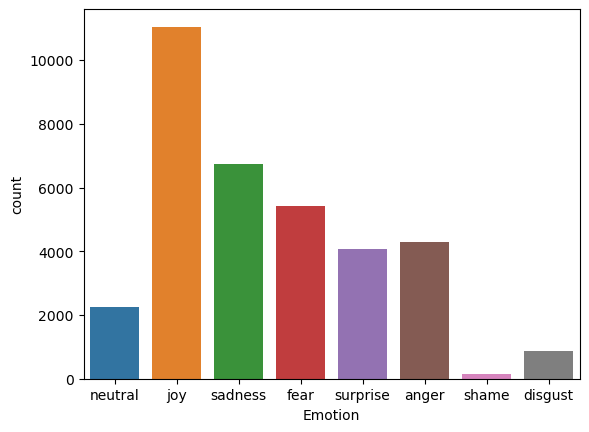

In [9]:
# Plot
sns.countplot(x='Emotion', data=df)

In [10]:
df['Text']

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
                               ...                        
34787    @MichelGW have you gift! Hope you like it! It'...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Text, Length: 34792, dtype: object

In [11]:
# User Handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [12]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [13]:
df

Emotion                                               Text  \
0       neutral                                             Why ?    
1           joy    Sage Act upgrade on my to do list for tommorow.   
2       sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3           joy   Such an eye ! The true hazel eye-and so brill...   
4           joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   
...         ...                                                ...   
34787  surprise  @MichelGW have you gift! Hope you like it! It'...   
34788       joy  The world didnt give it to me..so the world MO...   
34789     anger                           A man robbed me today .    
34790      fear  Youu call it JEALOUSY, I call it of #Losing YO...   
34791   sadness  I think about you baby, and I dream about you ...   

                                              Clean_Text  
0                                                      ?  
1                        Sage Act upgrade list tommorow.  
2      WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...  
3      eye ! true hazel eye-and brilliant ! Regular f...  
4      ugh babe.. hugggzzz u .! babe naamazed nga ako...  
...                                                  ...  
34787    gift! Hope like it! hand wear ! It'll warm! Lol  
34788    world didnt me..so world DEFINITELY cnt away!!!  
34789                                 man robbed today .  
34790                      Youu JEALOUSY, #Losing YOU...  
34791                             think baby, dream time  

[34792 rows x 3 columns]

In [14]:
# Features & Labels
Xfeatures = df['Clean_Text']
Ylabels = df['Emotion']

In [15]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, Ylabels, test_size=0.3, random_state=42)

In [19]:
from sklearn.pipeline import Pipeline

# Logistic Regression
pipe_lr = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('lr', LogisticRegression())
])

In [23]:
# Train and Fit Data
pipe_lr.fit(x_train, y_train)

C:\Users\Sajjad Amjad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [24]:
pipe_lr.score(x_test, y_test)

0.6200421536692853

In [39]:
# Make a Prediction
example1 = 'i am not sad'

In [40]:
pipe_lr.predict([example1])

array(['sadness'], dtype=object)

In [41]:
# Prediction Probability
pipe_lr.predict_proba([example1])

array([[0.0182595 , 0.0142382 , 0.02081765, 0.07682858, 0.01204702,
        0.83760849, 0.00085845, 0.01934211]])

In [42]:
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [47]:
import joblib
pipeline_file = open('emotion_pipe_lr.pkl', 'wb')
joblib.dump(pipe_lr, pipeline_file)
pipeline_file.close()